# Questão 1 - Classificação

## Sumário
- [Preliminares](#Preliminares)
- [Tratando atributos não numéricos](#Tratando-atributos-não-numéricos)
- [Analisando correlação](#Analisando-correlação)
- [Detectando outliers](#Detectando-outliers)
- [Analisando balanceamento](#Analisando-balanceamento)
- [Normalização dos atributos](#Normalização-dos-atributos)
- [Executando os algoritmos](#Executando-os-algoritmos)
- [Alterando parâmetros](#Alterando-parâmetros)
- [Conclusão](#Conclusão)

## Preliminares
Importação de dependências, carregamento da base de dados e observação inicial dos dados.

In [1]:
from scipy.io import arff
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import decomposition
from sklearn import manifold
from sklearn import multiclass
from sklearn import neighbors
from sklearn import svm
from sklearn import model_selection
from sklearn import metrics

In [2]:
#emotions.arff contem todas as instancias de test e train
sns.set(rc = {'figure.figsize':(16, 8)})
data = arff.loadarff('multilabel-classification-emotions/emotions.arff')
df = pd.DataFrame(data[0])

df.head()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2.0,0.245457,0.105065,0.405399,b'0',b'1',b'1',b'0',b'0',b'0'
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2.0,0.343547,0.276366,0.710924,b'1',b'0',b'0',b'0',b'0',b'1'
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3.0,0.188693,0.045941,0.457372,b'0',b'1',b'0',b'0',b'0',b'1'
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2.0,0.102839,0.241934,0.351009,b'0',b'0',b'1',b'0',b'0',b'0'
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2.0,0.195196,0.310801,0.683817,b'0',b'0',b'0',b'1',b'0',b'0'


Pelo visto nessas 5 primeiras linhas, o que se tem é que a base de dados aparenta ter sido originada por algum algoritmo de aprendizagem de máquina não supervisionado, além dos nomes e valores dos atributos não ajudarem muito a explicar o significado do mesmos.

Ainda, há uma alta dimensionalidade na base de dados, sendo 72 atributos de entrada e 6 atributos alvo, no caso dos atributos alvo, eles serão mantidos em colunas separadas:

In [3]:
labels = ['amazed-suprised', 'happy-pleased', 'relaxing-calm', 'quiet-still',
       'sad-lonely', 'angry-aggresive']

Quanto a duplicatas, vejamos quantas existem e caso existam, deverão ser removidas:

In [4]:
print("Duplicatas: %d" % (len(df[df.duplicated()])))
df.drop_duplicates(keep = 'first', inplace = True) #remover duplicatas, mantendo porem a primeira ocorrencia

df.reset_index(inplace = True) # por algum motivo eliminar linhas resulta em um index mucho louco
df.drop(columns = ['index'], inplace = True)

Duplicatas: 0


Informações sobre cada atributo da base de dados:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 78 columns):
Mean_Acc1298_Mean_Mem40_Centroid    593 non-null float64
Mean_Acc1298_Mean_Mem40_Rolloff     593 non-null float64
Mean_Acc1298_Mean_Mem40_Flux        593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_0      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_1      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_2      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_3      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_4      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_5      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_6      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_7      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_8      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_9      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_10     593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_11     593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_12     593 

Os únicos atributos não numéricos são os atributos alvos, que deverão ser convertidos posteriormente. Por fim, a última preliminar é checar se existe algum dado ausente e também quantos valores diferentes existem para cada atributo:

In [6]:
for (name, data) in df.iteritems():
    print("Coluna: %s Faltando: %d Valores Unicos: %d" % (name, df[name].isnull().sum(), len(df[name].unique())))

Coluna: Mean_Acc1298_Mean_Mem40_Centroid Faltando: 0 Valores Unicos: 592
Coluna: Mean_Acc1298_Mean_Mem40_Rolloff Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_Flux Faltando: 0 Valores Unicos: 584
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_0 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_1 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_2 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_3 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_4 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_5 Faltando: 0 Valores Unicos: 592
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_6 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_7 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_8 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_9 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_10 Faltando: 0 Valores Unicos: 592
Colu

~Milagrosamente~ Todos os atributos não possuem valores faltando, além disso todos os atributos possuem mais de um valor único. Portanto, nenhuma ação adicional será tomada quanto a eliminar colunas e/ou linhas por falta de dados.

- [Voltar pro topo](#Sumário)

## Tratando atributos não numéricos

Nesta base de dados, os únicos atributos apresentados de forma não numérica são os atributos alvos, como visto antes, cada um admite dois valores distintos, primeiramente, verifica-se quais são os valores existentes para cada um.

In [7]:
for label in labels:
    print("Valores únicos de", label, ":", df[label].unique(), "\n")

Valores únicos de amazed-suprised : [b'0' b'1'] 

Valores únicos de happy-pleased : [b'1' b'0'] 

Valores únicos de relaxing-calm : [b'1' b'0'] 

Valores únicos de quiet-still : [b'0' b'1'] 

Valores únicos de sad-lonely : [b'0' b'1'] 

Valores únicos de angry-aggresive : [b'0' b'1'] 



Para todos estes atributos, os valores existentes são b'0' ou b'1', logo é bastante simples mapear os valores existentes para valores numéricos usando um dicionário.

In [8]:
to_num = {
   "b'1'" : 1, "b'0'": 0
}

for label in labels:
    df[label] = df[label].apply(lambda x : to_num[str(x)])

- [Voltar pro topo](#Sumário)

## Analisando correlação

Inicialmente vejamos a matriz de correlação de todos os atributos da base da dados. 

Por conta da alta dimensionalidade da base de dados, a matriz será representada no formato de mapa de calor.

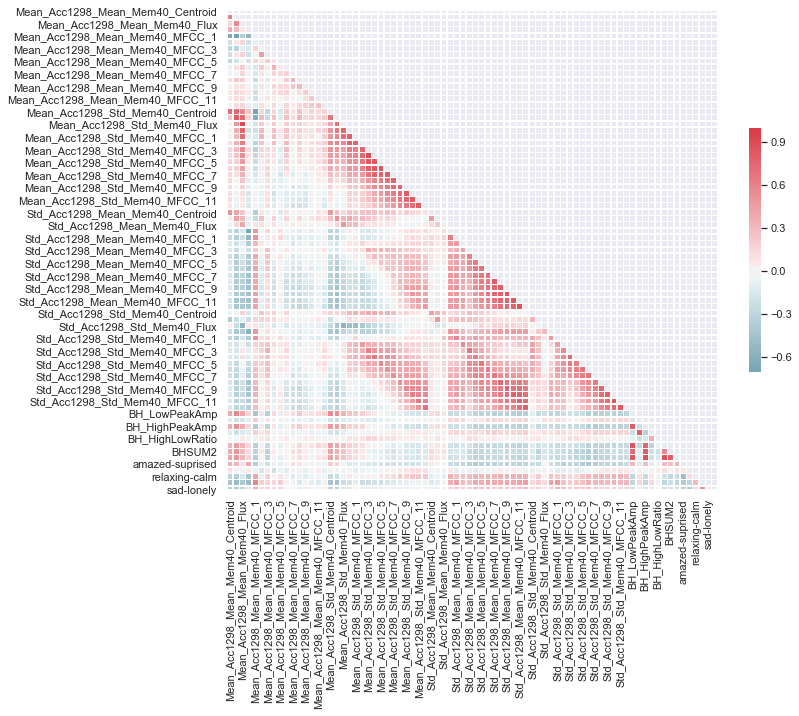

In [9]:
corr = df.corr()

# Apenas fazer a plotagem de metade da matriz, pois a matriz é simétrica
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Desenhar a matriz de correlação usando heatmap
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

A matriz acima mostra que existem um número considerável de pares de atributos com uma correlação positiva forte (representados pela cor vermelha mais intensa), quanto a correlação negativa, nenhum par de atributo aparenta ter uma correlação negativa forte (no caso do mapa acima o maior valor encontrado está próximo de -0.6).

Vejamos ainda a correlação dos atributos de entrada com cada um dos atributos de saída:

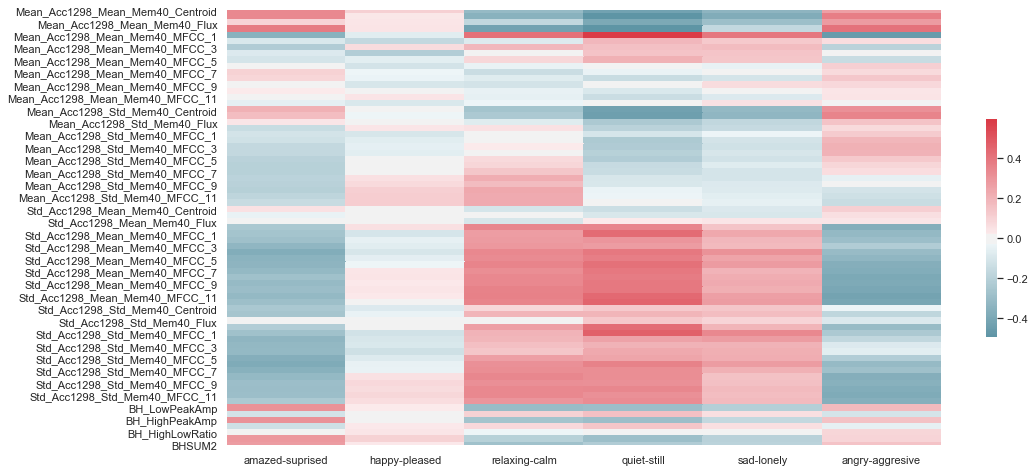

In [10]:
correl = df.corr().iloc[ : -6, -6: ]
#correl = df.corr()
#correl.style.background_gradient(cmap = 'coolwarm')
sns.heatmap(correl, cmap = cmap, center = 0,
            square = False, cbar_kws = {"shrink": .5})

Pela matriz acima, é possível perceber que nenhum atributo de entrada possui uma correlação forte (> 0.8, em valores absolutos) com algum atributo alvo, sendo a maior correlação observada algo próximo de 0.5.

Além disso, entre os 6 atributos alvo, o 'happy-pleased' é o que possui a correlação mais fraca com os atributos de entrada. 

Por fim, vejamos a correlação entre os atributos desejados:

In [11]:
correl_targets = df.corr().iloc[-6 : , -6: ]

correl_targets.style.background_gradient(cmap = 'coolwarm')

,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
amazed-suprised,1,0.0625649,-0.477873,-0.370126,-0.321184,0.293468
happy-pleased,0.0625649,1,0.129219,-0.298822,-0.383677,-0.329735
relaxing-calm,-0.477873,0.129219,1,0.298812,0.152166,-0.561723
quiet-still,-0.370126,-0.298822,0.298812,1,0.54541,-0.377725
sad-lonely,-0.321184,-0.383677,0.152166,0.54541,1,-0.269406
angry-aggresive,0.293468,-0.329735,-0.561723,-0.377725,-0.269406,1


Novamente, há uma ausência de correlação forte entre um par distinto de atributos que busca-se prever, sendo a maior correlação (em termos absolutos) a encontrada entre angry-agressive e relaxing-calm. 

Por fim, com base na correlação entre os atributos de entrada, vejamos quais são as maiores:

In [12]:
correl_in = df.corr().iloc[ : -6, : - 6]

c = correl_in.abs()

s = c.unstack()
so = s.sort_values(kind = "quicksort")

# Indices obtidos na mao
print(so[-120:-72])

BH_HighPeakAmp                   BHSUM2                             0.800536
BHSUM2                           BH_HighPeakAmp                     0.800536
BHSUM3                           BHSUM2                             0.800814
BHSUM2                           BHSUM3                             0.800814
Mean_Acc1298_Std_Mem40_MFCC_12   Mean_Acc1298_Std_Mem40_MFCC_11     0.803408
Mean_Acc1298_Std_Mem40_MFCC_11   Mean_Acc1298_Std_Mem40_MFCC_12     0.803408
Std_Acc1298_Mean_Mem40_MFCC_7    Std_Acc1298_Mean_Mem40_MFCC_8      0.804741
Std_Acc1298_Mean_Mem40_MFCC_8    Std_Acc1298_Mean_Mem40_MFCC_7      0.804741
Mean_Acc1298_Mean_Mem40_Rolloff  Mean_Acc1298_Std_Mem40_Rolloff     0.809104
Mean_Acc1298_Std_Mem40_Rolloff   Mean_Acc1298_Mean_Mem40_Rolloff    0.809104
Mean_Acc1298_Std_Mem40_MFCC_6    Mean_Acc1298_Std_Mem40_MFCC_7      0.810537
Mean_Acc1298_Std_Mem40_MFCC_7    Mean_Acc1298_Std_Mem40_MFCC_6      0.810537
BH_LowPeakAmp                    BH_HighPeakAmp                     0.816633

Este último código mostra que existem 24 pares distintos que possuem uma correlação forte (> 0.8), logo executar de uma técnica de redução de dimensionalidade como PCA ou T-SNE poderá ajudar a diminuir a dimensionalidade desta base de dados.

- [Voltar pro topo](#Sumário)

## Detectando outliers

Por conta da alta dimensionalidade da base de dados, a detecção de outliers será feita utilizando um laço percorrendo todas as colunas da base de dados, checando se existe algum outlier para tal coluna em cada iteração, caso positivo tais linhas que contém outliers são inseridas em uma lista, além de que é mostrado a quantidade de outliers para tal atributo (e sua porcentagem em relação ao total). 

A métrica utilizada para detectar outlier é o Z-score que mede o relacionamento de um valor para a média de um grupo de valores, medida em termos do desvio padrão da média, um valor 0 indica que o valor é identico ao 'score' da média e que um valor de 1.0 indica que o valor está a um desvio padrão da média. 

Neste caso, o valor utilizado para filtragem será 3.0, o que significa que valores que estão a três desvios padrões ou mais da média (em termos absolutos) serão considerados como outliers.


Colunas com outliers: 70 (Pct = 0.90)

Total: 486


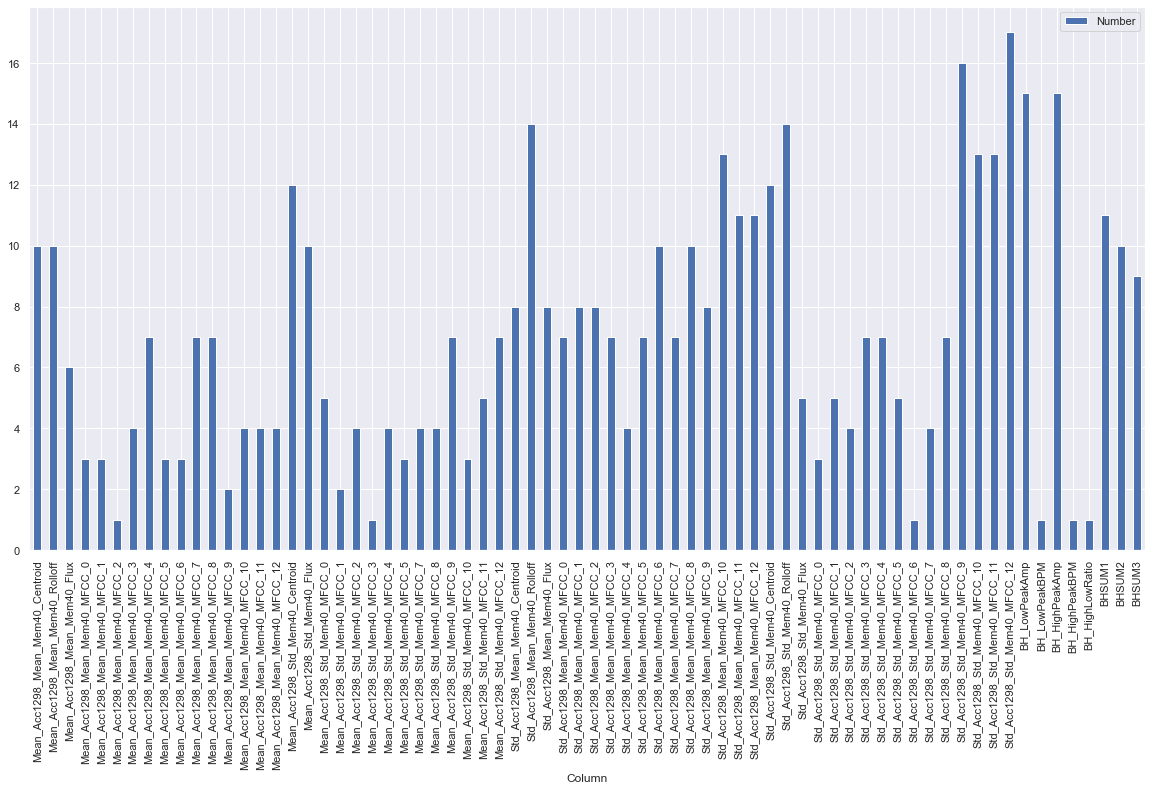

In [13]:
threshold = 3
outliers = []
columns = []
results = []
total = 0
for column in df.columns:
    outs = len(df[(np.abs(stats.zscore(df[column])) >= threshold)])
    total += outs
    if(outs > 0):
        columns.append(column)
        outliers.append(df[(np.abs(stats.zscore(df[column])) >= threshold)])
        results.append({"Number": len(df[(np.abs(stats.zscore(df[column])) >= threshold)]), "Column": column})
        #print("Outliers em %s: %d (Pct = %.2f)" % (column, outs, outs/len(df)))

print("\nColunas com outliers: %d (Pct = %.2f)" % (len(outliers), len(outliers)/len(df.columns)))
print("\nTotal: %d" % (total))

pd.DataFrame(results).plot.bar(x = "Column", y = "Number", figsize = (20, 10))

Pelo resultado acima, 90% (ou 70) das colunas possuem pelo menos 1 outlier, o gráfico mostra que nenhuma coluna possui mais do que 17 (ou 3%) dos seus valores como outliers, além de que há uma distribuição não uniforme dos outliers entre as colunas, o que indica os objetos que contém outliers, o mantém em um número diferente de colunas (por exemplo, um objeto X possui outliers em 2 colunas enquanto um Y possui outliers em 8).

Abaixo, vejamos a quantidade de entradas na base de dados que possuem pelo menos um outlier em uma das colunas:

In [14]:
outliers_df = pd.concat(outliers)

outliers_df.drop_duplicates(keep = 'first', inplace = True)

print("Instancias com outliers:", len(outliers_df))

outliers_df.head()

Instancias com outliers: 184


,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
44,0.172193,0.515556,0.089991,-72.913644,1.839893,2.311600,0.980418,0.896726,0.706043,0.739761,...,2.0,1.671050,1.646543,3.331277,1,1,0,0,0,0
91,0.168687,0.698277,0.093261,-73.425628,1.493242,2.140450,0.850997,1.201210,1.039796,0.835462,...,2.0,0.665140,0.694562,1.507699,1,0,0,0,0,1
101,0.188637,0.537260,0.096170,-77.755431,0.697836,1.256725,1.018783,0.604422,0.062336,-0.222341,...,2.0,1.443186,1.762948,3.206134,0,0,0,0,0,1
111,0.172679,0.504049,0.098053,-69.838918,1.960140,0.882767,0.600617,0.740820,0.494457,0.262374,...,2.0,0.448257,1.175462,2.258324,1,0,0,0,0,1
136,0.174965,0.544257,0.085136,-68.118250,1.660375,0.367742,0.917574,0.990992,0.917184,0.359717,...,2.0,1.201197,1.435895,2.656136,1,0,0,0,0,0


Existem 184 linhas com outlier em pelo menos uma coluna (ou 31% da base dados contém um outlier em pelo menos uma das colunas), o que significa que eliminar todas essas linhas simplesmente poderá empobrecer a base de dados.

Por ora, pelo fato do alto número de outliers e o desconhecimento do que se trate cada atributo, não será feito nenhum tratamento para outliers.

- [Voltar pro topo](#Sumário)

## Analisando balanceamento

Por se tratar de um problema de classificação de vários atributos desejados, é interessante ver tanto o balanceamento desses atributos individualmente, quanto se comparados com os outros, além de a quantas classes um mesmo objeto pertence.

Quantidade de amazed-suprised 0: 420 (Pct = 0.708)
Quantidade de amazed-suprised 1: 173 (Pct = 0.292)
Quantidade de happy-pleased 0: 427 (Pct = 0.720)
Quantidade de happy-pleased 1: 166 (Pct = 0.280)
Quantidade de relaxing-calm 0: 329 (Pct = 0.555)
Quantidade de relaxing-calm 1: 264 (Pct = 0.445)
Quantidade de quiet-still 0: 445 (Pct = 0.750)
Quantidade de quiet-still 1: 148 (Pct = 0.250)
Quantidade de sad-lonely 0: 425 (Pct = 0.717)
Quantidade de sad-lonely 1: 168 (Pct = 0.283)
Quantidade de angry-aggresive 0: 404 (Pct = 0.681)
Quantidade de angry-aggresive 1: 189 (Pct = 0.319)


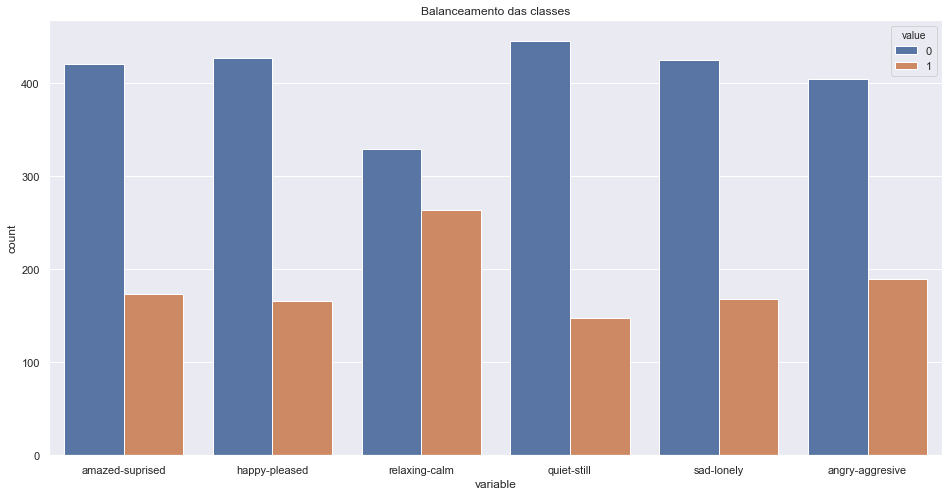

In [15]:
melt = pd.melt(df[labels])
plt.title("Balanceamento das classes")
sns.countplot(data = melt.loc[melt['value'] >= 0], x = 'variable', hue = 'value')
for label in labels:
    count = df[label].value_counts()
    print("Quantidade de %s 0: %d (Pct = %.3f)" %(label, count[0], count[0] / len(df)))
    print("Quantidade de %s 1: %d (Pct = %.3f)" %(label, count[1], count[1] / len(df)))

Pelo gráfico acima, se analisado individualmente as labels, percebe-se que com exceção de relaxing-calm, o balanceamento de cada label está na proporção 3:1 ou pior, mesmo se considerado relaxing-calm, nenhuma classe possui um desbalanceamento menor que 10%, em termos proporcionais.

Agora considerando apenas os valores '1' de cada atributo, o gráfico obtido é o seguinte:

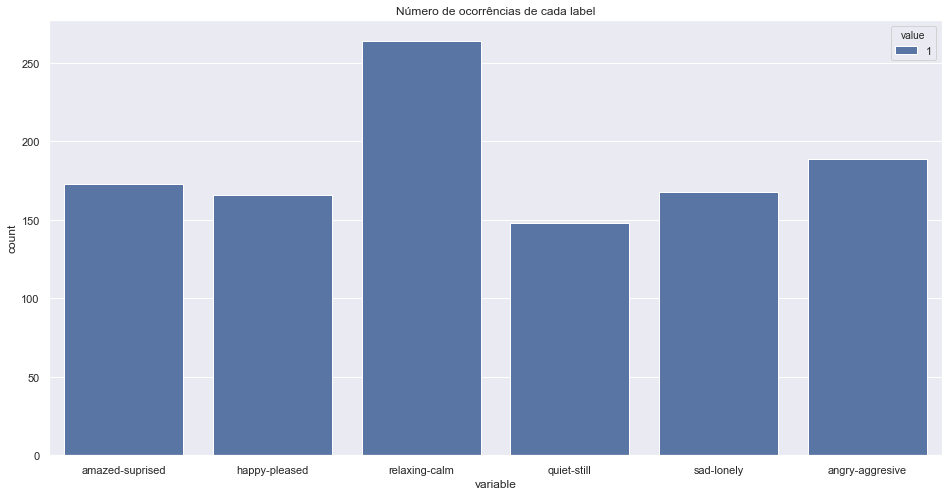

In [16]:
plt.title("Número de ocorrências de cada label")
sns.countplot(data = melt.loc[melt['value'] == 1], x = 'variable', hue = 'value')

Desta maneira, o que se observa é que a classe relaxing-calm se encontra desbalanceada em relação as outras classes (em termos proporcionais ocorre pelo menos 10% mais do que qualquer outra classe), enquanto que as outras classes estão razoavelmente balanceadas entre si, ocorrendo em 25% a 31.9% dos objetos.

Ainda vejamos como está a distribuição dos objetos em relação ao número de labels que estes possuem.

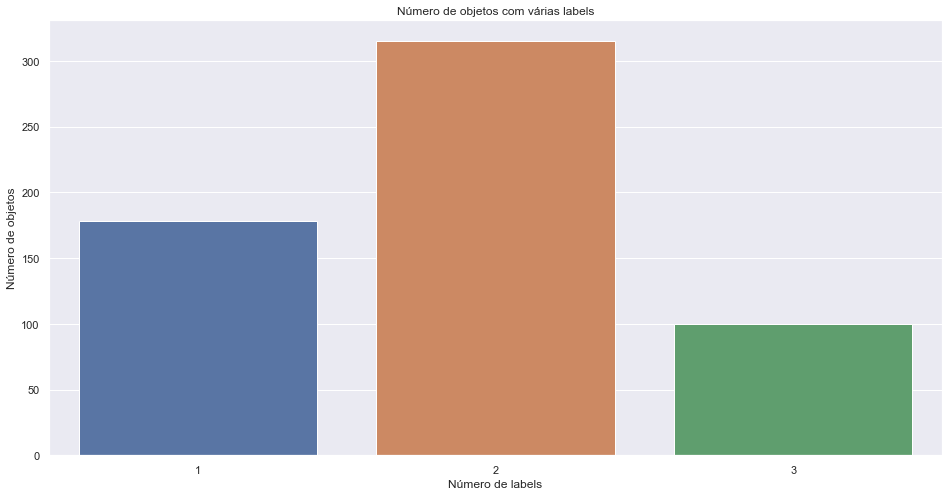

In [17]:
sums = df.iloc[ : , -6: ].sum(axis = 1)
counts = sums.value_counts()
plt.title("Número de objetos com várias labels")
plt.xlabel("Número de labels")
plt.ylabel("Número de objetos")
sns.barplot(counts.index, counts.iloc[0 : ].values)

Pelo gráfico acima, percebe-se que todo objeto da base de dados possui entre 1 e 3 labels, sendo 2 labels o mais comum, além disso a soma dos objetos que possuem 1 e 3 labels não supera o número de objetos que possuem 2 labels.

Sendo assim, o que se tem é que a base de dados está desbalanceada em relação aos atributos desejados de várias maneiras, contudo, a decisão tomada aqui é de manter o balanceamento da maneira que se encontra, apesar de que posteriormente isto pode vir a resultar em um modelo pior.

- [Voltar pro topo](#Sumário)

## Normalização dos atributos

Para evitar dar um peso maior a um atributo em particular é feita a normalização da base de dados, por conta da falta de tratamento para outliers a normalização dos atributos foi feita por meio da padronização.

In [18]:
df_labels = df[labels].copy()

dummy_df = df.copy()
dummy_df.drop(columns = labels, inplace = True)

scaler = preprocessing.StandardScaler()

scaled = pd.concat([pd.DataFrame(scaler.fit_transform(dummy_df), columns = dummy_df.columns.values), df_labels], axis=1)

scaled.head()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,-1.105588,-0.899816,0.597753,-0.040161,0.597089,0.012470,0.565174,0.378949,1.270225,0.166709,...,-0.315080,-0.493653,-0.690238,-0.851414,0,1,1,0,0,0
1,0.385855,0.658245,0.004144,1.374865,-0.867621,-0.807026,-2.527081,-0.031013,-1.020242,-1.539939,...,-0.315080,-0.204534,-0.216973,-0.382298,1,0,0,0,0,1
2,1.318818,0.665224,-0.138854,1.024886,-1.055153,0.036048,-0.681981,0.275978,-0.936280,0.394614,...,2.851744,-0.660964,-0.853584,-0.771613,0,1,0,0,0,1
3,-0.858043,0.033036,0.837920,-0.964686,0.408315,0.045688,0.099403,1.921137,-0.255584,0.995258,...,-0.315080,-0.914017,-0.312101,-0.934927,0,0,1,0,0,0
4,0.167606,-0.463967,-0.638319,-2.732823,0.272482,0.454261,-1.312511,0.571361,-0.357706,-0.057338,...,-0.315080,-0.641796,-0.121837,-0.423919,0,0,0,1,0,0


- [Voltar pro topo](#Sumário)

## Executando os algoritmos

Inicialmente, gera-se o conjunto de treinamento e teste, a divisão utilizada é a 80/20, sendo ambas geradas de maneira semi-aleatória, a partir do parâmetro 'random_state'.

In [19]:
train, test = model_selection.train_test_split(scaled.copy(), test_size = 0.2, random_state = 77, shuffle = True)

trainTarget = train[labels].copy()
testTarget = test[labels].copy()

train.drop(columns = labels, inplace = True)
test.drop(columns = labels, inplace = True)

O primeiro algoritmo utilizado será o de vizinho mais próximo (K-NN), o motivo da escolha é que por ser um dos algoritmos de aprendizagem de máquina mais simples que se tem, pode ser utilizado para entender se um problema como é o caso deste, é possível de ser resolvido com resultados satisfatórios utilizando este algoritmo, e também como algoritmos mais elaborados (como o caso do SVC utilizado posteriormente) se compara frente a este neste mesmo problema.

Inicialmente os parâmetros para o número de vizinhos serão 3 e a métrica de distância será a de minkowski, que é equivalente a euclidiana para o parâmetro p = 2.

In [20]:
classifierKnn = multiclass.OneVsRestClassifier(neighbors.KNeighborsClassifier(n_neighbors = 3, p = 2, metric = "minkowski"))
classifierKnn.fit(train, trainTarget)
resultKnn = classifierKnn.predict(test)

O segundo algoritmo utilizado será a SVM (Support Vector Machine) para classificação, algoritmo recomendado para espaços com alta dimensionalidade, que é o caso da base de dados tratada nesta questão:

Inicialmente, os parâmetros utilizados para função kernal será a 'poly', que utilizará um hiperplano não-linear para separar os dados, e o parâmetro gamma que é utilizado para hiperplanos deste tipo, quanto maior o gamma, melhor o modelo se ajusta ao conjunto de treinamento, aqui o gamma inicial utilizado será o 'scale' que é calculado utilizando a fórmula 1 / (número de atributos * variância da base de dados).

O parâmetro random_state é utilizado para poder replicar os resultados obtidos posteriormente, pois este algoritmo faz uso de um número gerado aleatoriamente por meio de um seed (no caso, o random_state) para misturar os dados para estimação de probabilidades.

In [21]:
classifierSvc = multiclass.OneVsRestClassifier(svm.SVC(kernel = 'poly', gamma = 'scale', random_state = 42))
classifierSvc.fit(train, trainTarget)
resultSvc = classifierSvc.predict(test)

Para avaliação do desempenho dos algoritmos serão utilizados as métricas F1, acurácia, sensibilidade e especificidade, além da matriz de confusão:

A matriz de confusão está no formato: 

[[verdadeiro negativo, falso positivo] 

[falso negativo, verdadeiro positivo]]

In [22]:
def getMetrics(target, result, labels, algorithm = "Unnamed", plot = True):
    if algorithm != "Unnamed":
        print(algorithm)
    print("F1: %0.3f" % (metrics.f1_score(target, result, average = 'macro')))
    
    matrix = metrics.multilabel_confusion_matrix(target, result)
    sens = 0
    spec = 0
    accu = 0
    results = []
    for i in range(len(matrix)):
        [[true_negative, false_positive], [false_negative, true_positive]] = matrix[i]
        sen = (true_positive / (true_positive + false_negative))
        sp = (true_negative / (true_negative + false_positive))
        acc = ((true_positive + true_negative) / (true_positive + false_negative + true_negative + false_positive))
        sens += sen
        spec += sp
        accu += acc
        results.append({"Label": labels[i], "Sensibilidade": sen, "Especificidade": sp, "Acuracia": acc})
        
    print("Sensibilidade: %0.3f" % (sens / len(matrix)))
    print("Especificidade: %0.3f" % (spec / len(matrix)))
    print("Acuracia: %0.3f" % (metrics.accuracy_score(target, result, normalize = True)))
    print("Media acuracia (individual): %0.3f\n" % (accu / len(matrix)))
    if plot is True:
        pd.DataFrame(results).plot.bar(x = "Label")

def getMatrix(target, result, algorithm = "Unnamed"):
    if algorithm != "Unnamed":
        print(algorithm)
    matrix = metrics.multilabel_confusion_matrix(target, result)
    for i in range(len(matrix)):
        print("Matriz de confusão para %s" % (labels[i]))
        print(matrix[i])
        print()

K-NN (vs Test)
F1: 0.648
Sensibilidade: 0.627
Especificidade: 0.845
Acuracia: 0.269
Media acuracia (individual): 0.784

Matriz de confusão para amazed-suprised
[[76 11]
 [15 17]]

Matriz de confusão para happy-pleased
[[68  9]
 [24 18]]

Matriz de confusão para relaxing-calm
[[38 26]
 [13 42]]

Matriz de confusão para quiet-still
[[80  6]
 [ 7 26]]

Matriz de confusão para sad-lonely
[[72 10]
 [11 26]]

Matriz de confusão para angry-aggresive
[[80  8]
 [14 17]]

K-NN (vs Train)
F1: 0.786
Sensibilidade: 0.766
Especificidade: 0.921
Acuracia: 0.508
Media acuracia (individual): 0.879



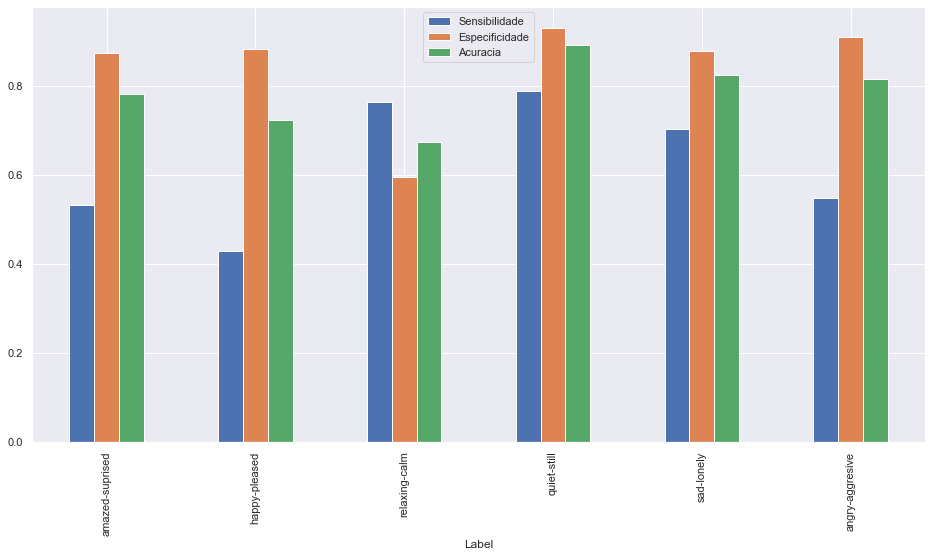

In [23]:
getMetrics(testTarget, resultKnn, labels, "K-NN (vs Test)")
getMatrix(testTarget, resultKnn)
getMetrics(trainTarget, classifierKnn.predict(train), labels, "K-NN (vs Train)", plot = False)

SVC (vs Test)
F1: 0.409
Sensibilidade: 0.302
Especificidade: 0.945
Acuracia: 0.134
Media acuracia (individual): 0.746

Matriz de confusão para amazed-suprised
[[83  4]
 [21 11]]

Matriz de confusão para happy-pleased
[[73  4]
 [41  1]]

Matriz de confusão para relaxing-calm
[[52 12]
 [23 32]]

Matriz de confusão para quiet-still
[[86  0]
 [22 11]]

Matriz de confusão para sad-lonely
[[82  0]
 [27 10]]

Matriz de confusão para angry-aggresive
[[84  4]
 [23  8]]

SVC (vs Train)
F1: 0.676
Sensibilidade: 0.532
Especificidade: 0.994
Acuracia: 0.460
Media acuracia (individual): 0.859



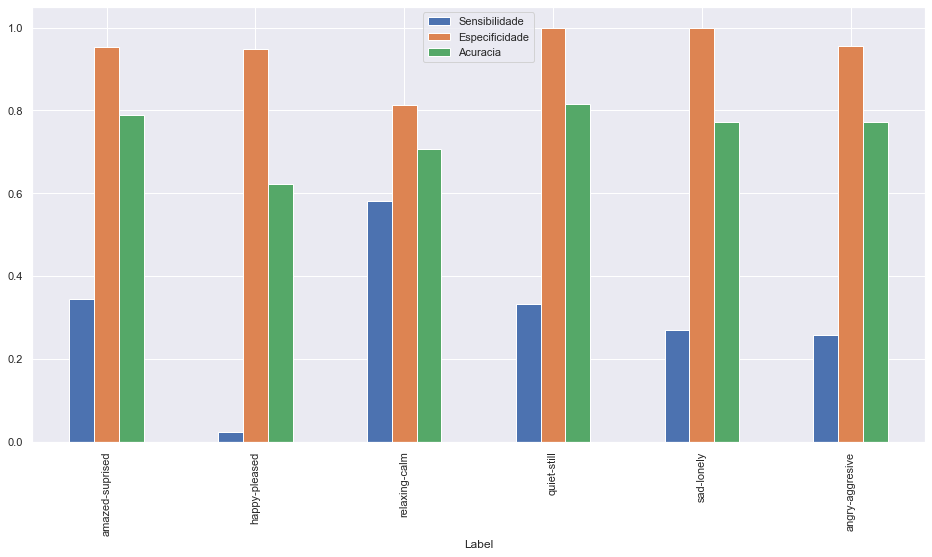

In [24]:
getMetrics(testTarget, resultSvc, labels, "SVC (vs Test)")
getMatrix(testTarget, resultSvc)
getMetrics(trainTarget, classifierSvc.predict(train), labels, "SVC (vs Train)", plot = False)

Pelos resultados acima, o que se têm é que ambos os algoritmos não obtiveram um desempenho ruim frente ao conjunto de teste. Vejamos os resultados de cada métrica:

- Sensibilidade: a análise dos dois gráficos mostra que o modelo da SVC falhou terrívelmente em classificar corretamente as os objetos como positivos em cada atributo, sendo o caso mais gritante o de happy-pleased, onde é possível ver pela matriz de confusão que apenas 1 instância foi corretamente classificada como tal, sendo que neste caso apenas 5 instâncias foram classificadas como happy-pleased.


- Especificidade: os resultados apontam que na maior parte dos atributos, os objetos foram corretamente classificados como negativos, contudo o atributo em que a métrica apresentou o pior desempenho foi o de relaxing-calm.

Para estas duas métricas, a impressão que se tem é que o desbalanceamento das classes levou o modelo a tender classificar os objetos mais para negativo, que é justamente a classe predominante para todos os atributos que se deseja prever, obtendo assim resultados melhores para especificidade, principalmente pelo SVC.

- Acurácia: o resultado mostra que ambos os modelos não conseguiram prever mais de 30% dos objetos corretamente de maneira completa (i.e. todos os atributos foram classificados corretamente), sendo o melhor resultado obtido pelo K-NN.

Esta métrica, se comparada as outras, acaba por resultar em um número menor pelo fato de que como o modelo não tende a classificar corretamente os objetos em todos os atributos e apresenta um viés para a classe majoritária (0 em todos os atributos), o objeto acaba por ser considerado incorretamente classificado.

Sendo assim também foi utilizado a acurácia individual de cada label, por esta é possível ver um valor muito maior daquele observado anteriormente, contudo, pela análise dos dois gráficos o que se observa é que, a acurácia individual apesar de sempre estar acima de 0.6, não quer dizer que o modelo vem a classificar aquele atributo de uma maneira satisfatória, uma vez que há um desbalanceamento gritante em 5 dos 6 atributos desejados. 

- F1: percebe-se que esta apresentou valores maiores que a acurácia (se analisado a acurácia em conjunto), porém menor do que a média da acurácia individual, isso por conta de que a acurácio acabou sendo maior pelo alto número de verdadeiros negativos observados na matriz de confusão, como a métrica F1 busca uma média ponderada entre a precisão e a sensibilidade, o resultado observado para esta aparenta ser uma métrica melhor para o caso desta base de dados desbalanceada.

Por fim, percebe-se pelas matrizes de confusão, que de fato os modelos tenderam a classificar mais os objetos como sendo das classes majoritárias, resultando assim, em um número muito maior de Verdadeiros e Falsos Negativos do que de Verdadeiros e Falsos Positivos.

- [Voltar pro topo](#Sumário)

## Alterando parâmetros

Usando o mesmo conjunto de treinamento e teste, desta vez, reexcuta-se os algoritmos alterando os parâmetros deles.

Para o K-NN a função de distância será alterada para manhattan, que é dado pelo somátorio do módulo da diferença dos valores em cada dimensão, enquanto que o número de vizinhos será alterado por meio de um laço, com o propósito de observar qual o melhor número de vizinhos para este problema:

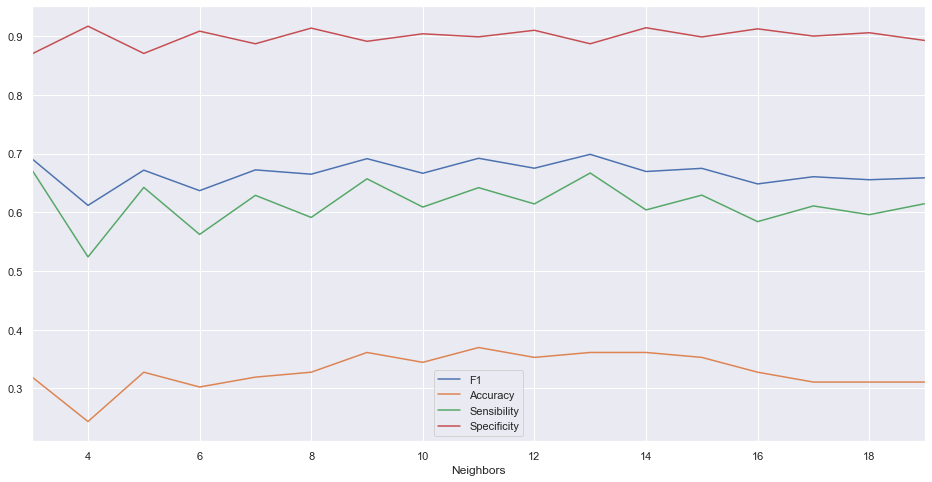

In [25]:
results_neighbors = []

for n in range(3, 20):
    classifierKnn = multiclass.OneVsRestClassifier(neighbors.KNeighborsClassifier(n_neighbors = n, p = 2, metric = "manhattan"))
    classifierKnn.fit(train, trainTarget)
    resultKnn = classifierKnn.predict(test)
    
    matrix = metrics.multilabel_confusion_matrix(testTarget, resultKnn)
    sens = 0
    spec = 0
    for i in range(len(matrix)):
        [[true_negative, false_positive], [false_negative, true_positive]] = matrix[i]
        sen = (true_positive / (true_positive + false_negative))
        sp = (true_negative / (true_negative + false_positive))
        sens += sen
        spec += sp        
    
    results_neighbors.append({"Neighbors": n, 
                         "F1": metrics.f1_score(testTarget, resultKnn, average = 'macro'),
                         "Accuracy": metrics.accuracy_score(testTarget, resultKnn, normalize = True),
                         "Sensibility": sens / len(matrix),
                         "Specificity": spec / len(matrix)})
    
pd.DataFrame(results_neighbors).plot.line(x = "Neighbors",
                                y = ["F1", "Accuracy", "Sensibility", "Specificity"])

Pelo gráfico acima, percebe-se que para 3 vizinhos (mesmo número utilizado originalmente), os resultados obtidos foram melhores do que quando utilizado a distância euclidiana, além disso números pares de vizinhos aparentam causar um desempenho pior no modelo (talvez pelo critério de desempate), sendo que o modelo apresentou resultados melhores para um valor de N igual a 11.

Quanto ao SVC, o parâmetro da função kernel será alterado para rbf e o parâmetro do gamma para auto, que irá resultar em gamma = (1 / número de atributos):

In [26]:
classifierSvc2 = multiclass.OneVsRestClassifier(svm.SVC(kernel = 'rbf', gamma = 'auto', random_state = 42))
classifierSvc2.fit(train, trainTarget)
resultSvc2 = classifierSvc2.predict(test)

In [27]:
getMetrics(testTarget, resultSvc2, labels, "SVC V2 (vs Test)", plot = False)
getMetrics(trainTarget, classifierSvc2.predict(train), labels, "SVC V2 (vs Train)", plot = False)

SVC V2 (vs Test)
F1: 0.656
Sensibilidade: 0.603
Especificidade: 0.899
Acuracia: 0.286
Media acuracia (individual): 0.810

SVC V2 (vs Train)
F1: 0.803
Sensibilidade: 0.749
Especificidade: 0.957
Acuracia: 0.555
Media acuracia (individual): 0.902



Em comparação a execução anterior, percebe-se que a alteração dos parâmetros gerou resultados melhores em todas as métricas, exceto pela especificidade, além do modelo ter se ajustado melhor ao treinamento, muito pelo fato do gamma utilizado ser maior (quanto maior o valor de gama melhor o modelo se ajusta ao treinamento), contudo, antes de concluir sobre o impacto da função kernel vejamos utilizando um valor gamma igual ao utilizado anteriormente:

In [28]:
classifierSvc3 = multiclass.OneVsRestClassifier(svm.SVC(kernel = 'rbf', gamma = 'scale', random_state = 42))
classifierSvc3.fit(train, trainTarget)
resultSvc3 = classifierSvc3.predict(test)

In [29]:
getMetrics(testTarget, resultSvc3, labels, "SVC V3 (vs Test)", plot = False)
getMetrics(trainTarget, classifierSvc3.predict(train), labels, "SVC V3 (vs Train)", plot = False)

SVC V3 (vs Test)
F1: 0.657
Sensibilidade: 0.606
Especificidade: 0.897
Acuracia: 0.286
Media acuracia (individual): 0.810

SVC V3 (vs Train)
F1: 0.800
Sensibilidade: 0.746
Especificidade: 0.956
Acuracia: 0.551
Media acuracia (individual): 0.901



O resultado acima acaba por provar o contrário: Na realidade, o parâmetro que teve o maior impacto foi o de mudar a função kernel.

- [Voltar pro topo](#Sumário)

## Conclusão

Todos os modelos apresentaram um desempenho relativamente ruim, o que se justifica em grande parte pelo desbalanceamento presente entre as classes, sendo este um problema que apesar de detectado, não foi tratado, além de outliers que se encontram presentes na base de dados, onde apesar de detectados, foi optado por não fazer a remoção destes por conta do alto número de objetos com um outlier em pelo menos uma das colunas.

Por fim, o fato dos atributos possuírem nomes e valores que não ajudam a explicar do que estes se tratam, também vem a atrapalhar no pré-processamento, e consequentemente, na geração dos modelos.